# Data Exploration and Preprocessing and Model development

In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
#load and save model
import pickle as pk

In [2]:
#Load data
credit_card_data=pd.read_csv(r"C:\Users\HP\Documents\ML, AI and DL\creditcard_data.csv")

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#information on the dataset
credit_card_data.shape

(284807, 31)

In [5]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#checking missing values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
credit_card_data['Class'].value_counts()
#The distribution of the category shows the data is highly inbalanced

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#defining the class independently into legit and fraudulent category......0-->Legit transaction, 1-->Fradulent transaction
legit_transaction=credit_card_data[credit_card_data.Class==0]
fraudulent_transaction=credit_card_data[credit_card_data.Class==1]

In [9]:
fraudulent_transaction.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [10]:
# statistical measures of the legit data
legit_transaction.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [11]:
fraudulent_transaction.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [12]:
# compare the mean values for both transactions
credit_card_data.groupby('Class').mean()

# A significant difference in the mean of the two class further gives us insight that the fraudulent transaction can be predicted

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


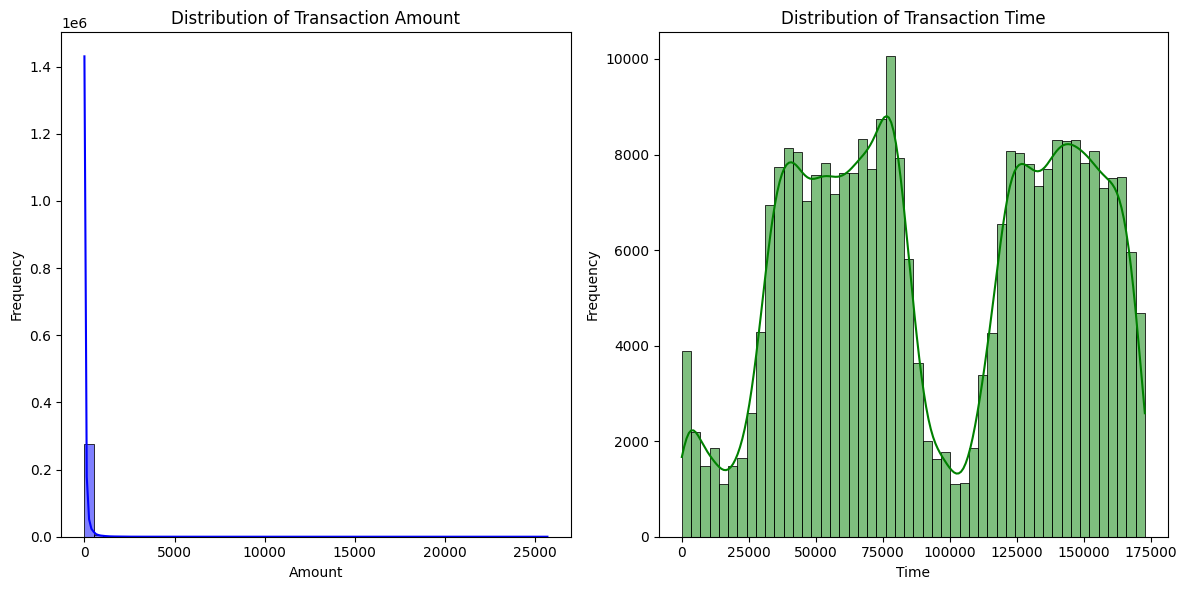

In [13]:
# Plotting the distribution of 'Amount' and "Time" with their frequencies
plt.figure(figsize=(12, 6))

# Distribution of 'Amount'
plt.subplot(1, 2, 1)
sns.histplot(credit_card_data['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Distribution of 'Time'
plt.subplot(1, 2, 2)
sns.histplot(credit_card_data['Time'], bins=50, kde=True, color='green')
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#Transaction amounts are highly skewed, with most transactions having lower amounts.
#The Time variable does not show a distinct pattern.

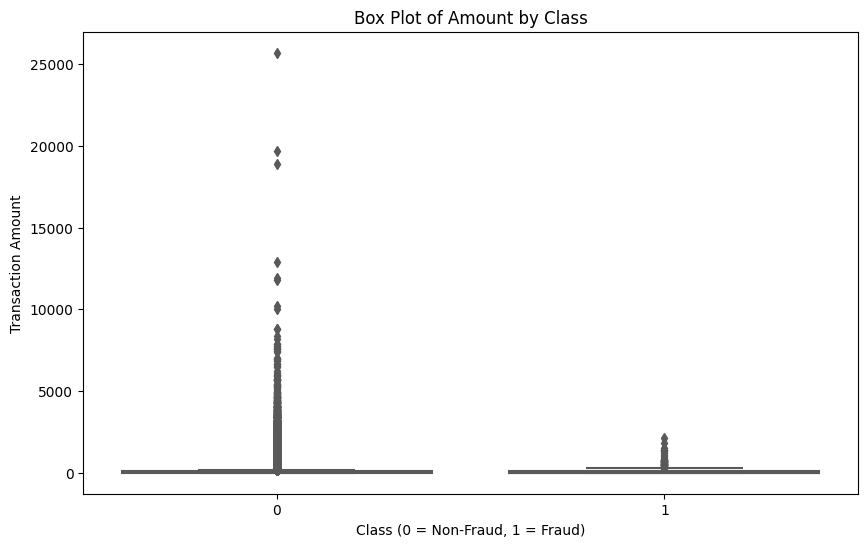

In [14]:
# Create a box plot to further explain/investigate the class distribution based on the amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card_data, palette='Set2')
plt.title('Box Plot of Amount by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

# fraudsters were found concentrated between  0 to 2000 which furthr explain the chart before this cell

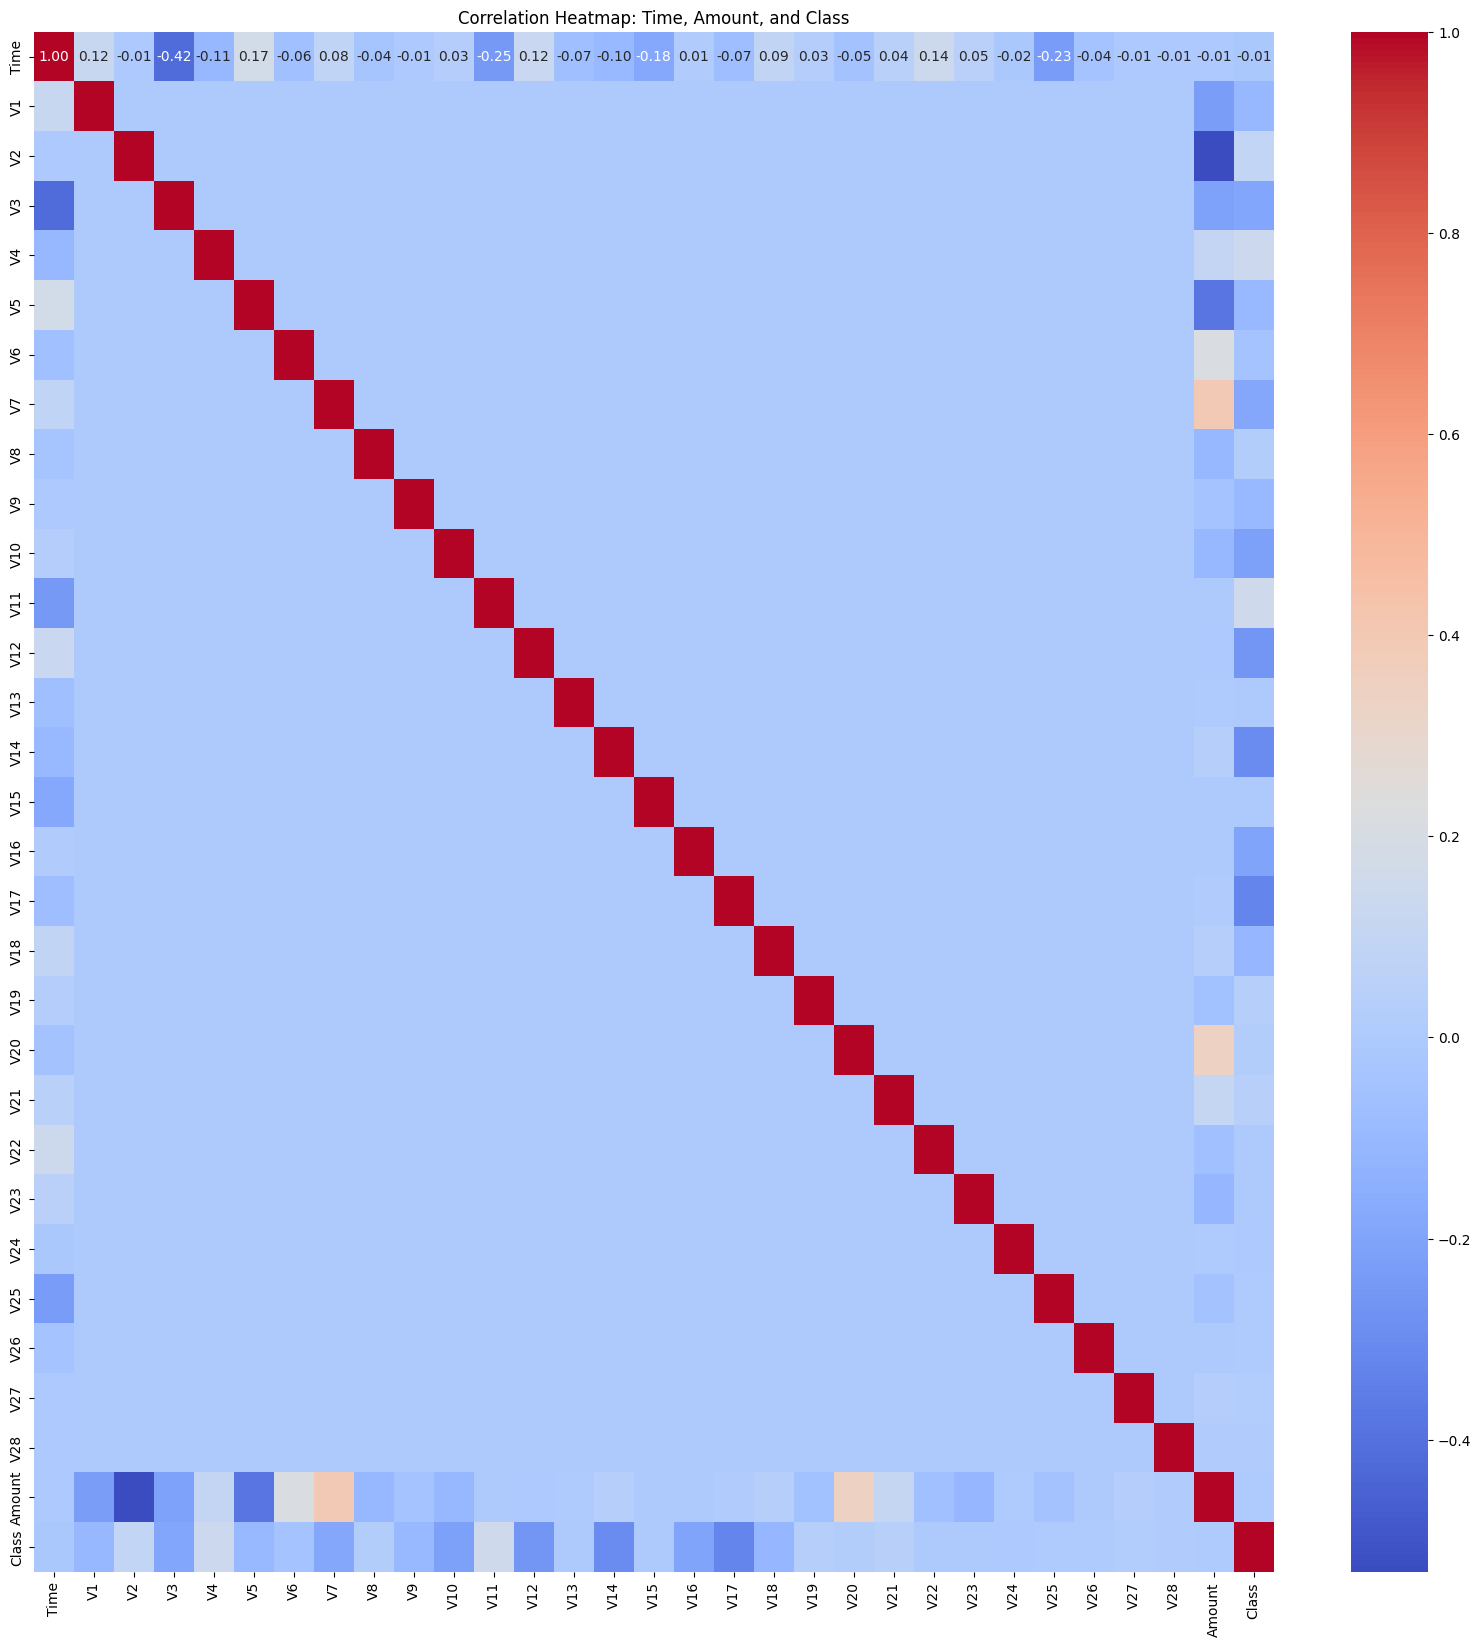

In [15]:
# Compute the correlation matrix
correlation_matrix = credit_card_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Time, Amount, and Class')
plt.show()

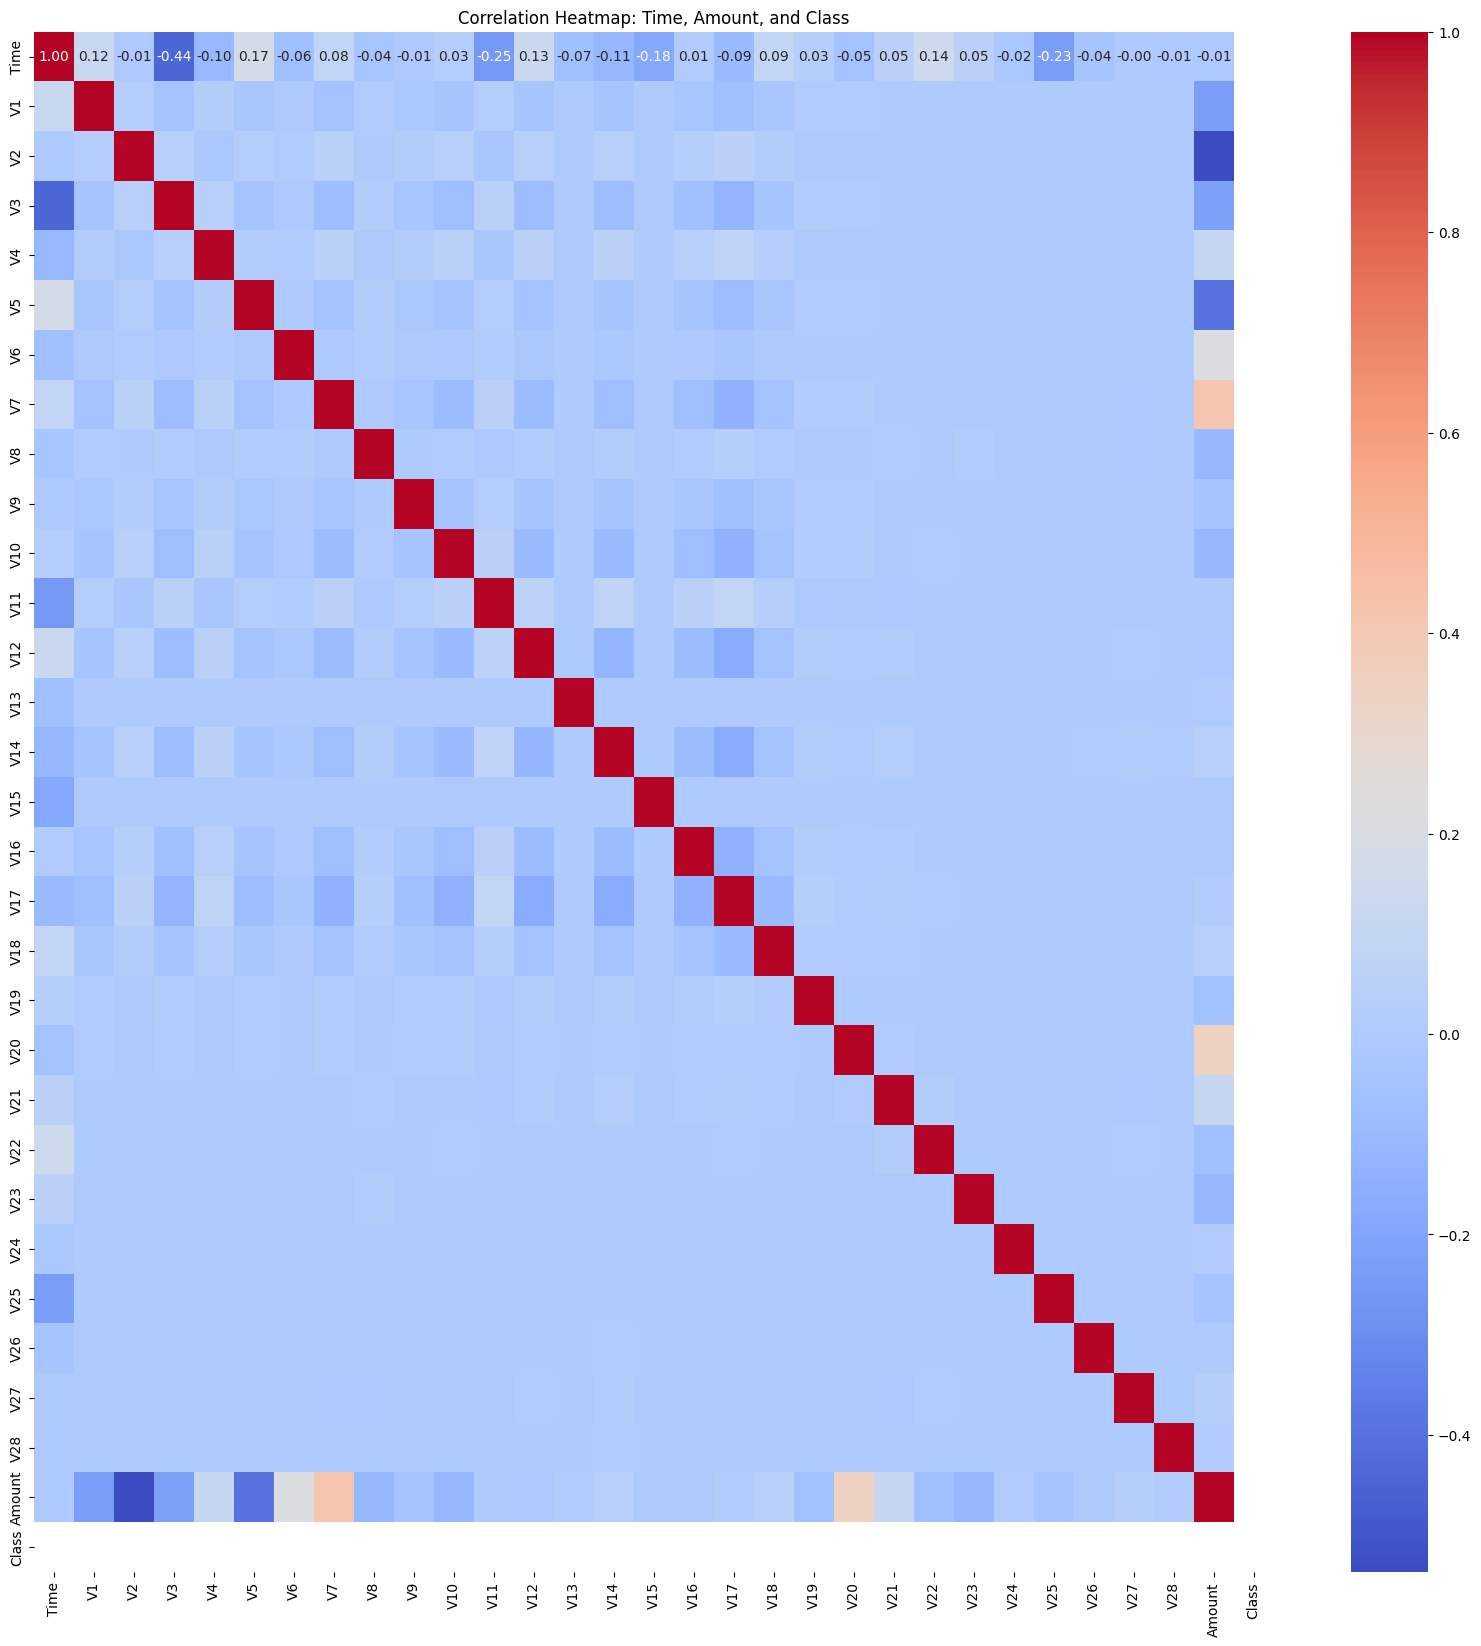

In [16]:
# Compute the correlation matrix for legit class
correlation_matrix = legit_transaction.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Time, Amount, and Class')
plt.show()

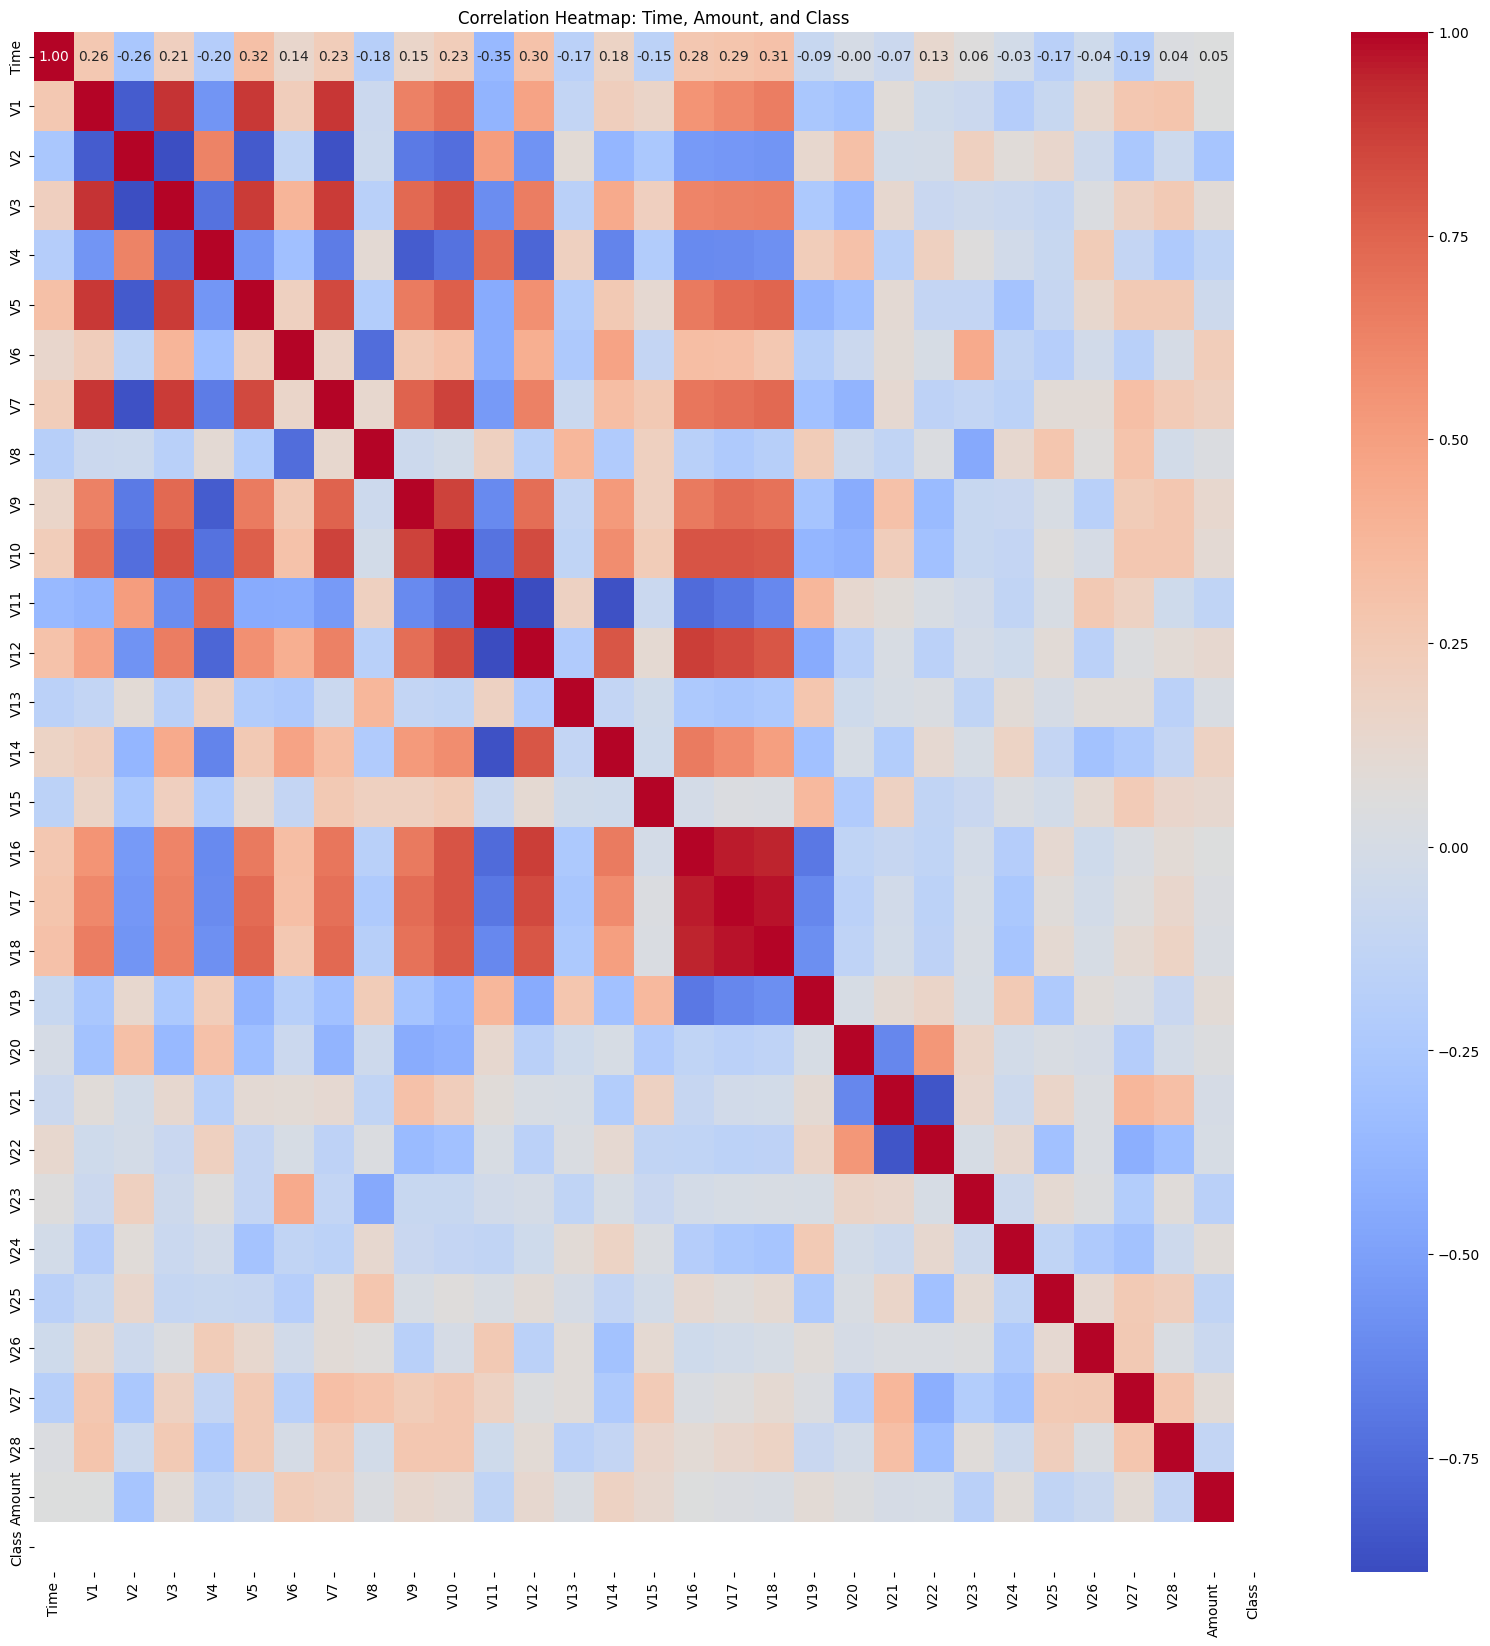

In [17]:
# Compute the correlation matrix for fraudulent class
correlation_matrix = fraudulent_transaction.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Time, Amount, and Class')
plt.show()

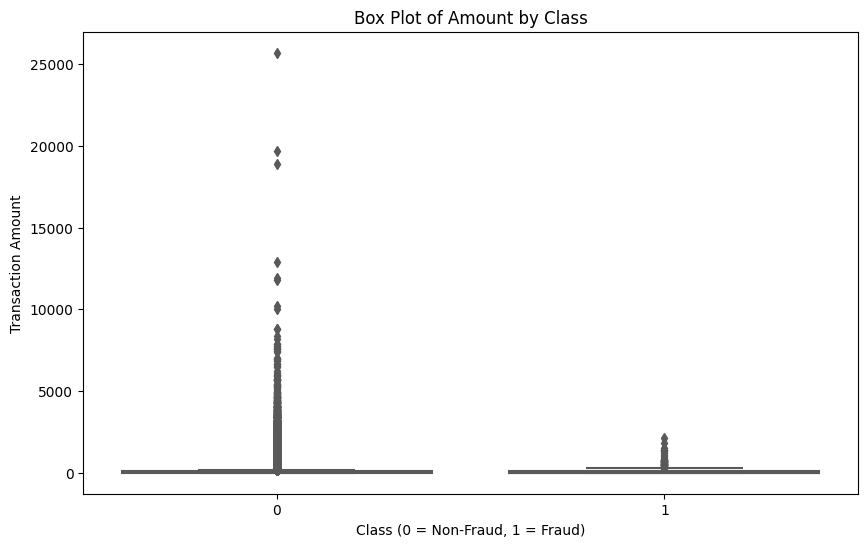

In [18]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card_data, palette='Set2')
plt.title('Box Plot of Amount by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

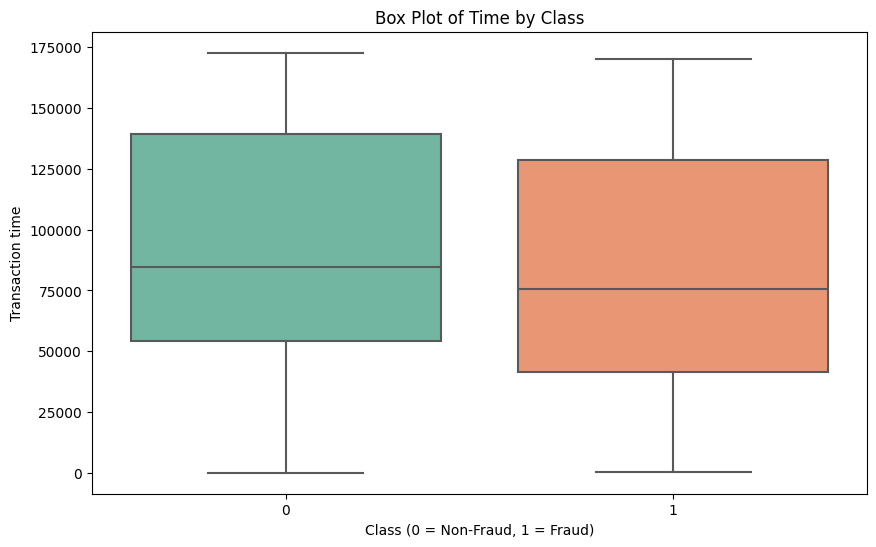

In [19]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Time', data=credit_card_data, palette='Set2')
plt.title('Box Plot of Time by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction time')
plt.show()

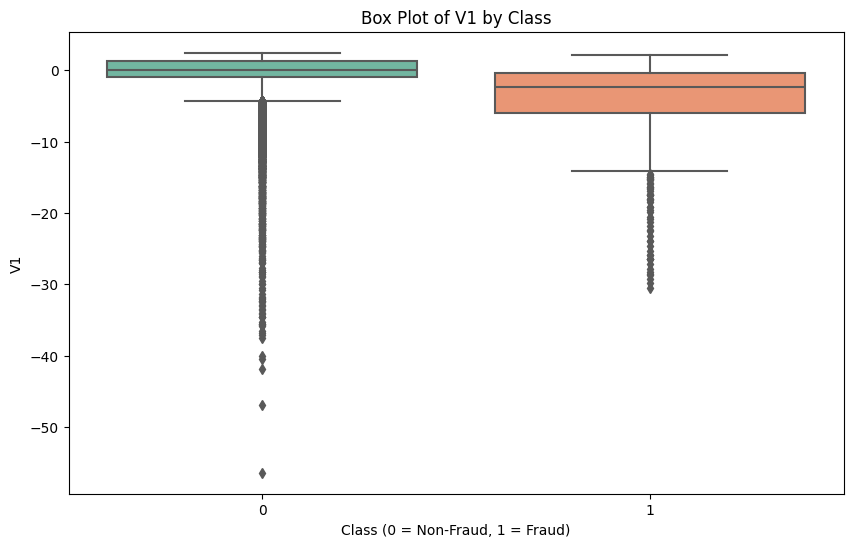

In [20]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='V1', data=credit_card_data, palette='Set2')
plt.title('Box Plot of V1 by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('V1')
plt.show()

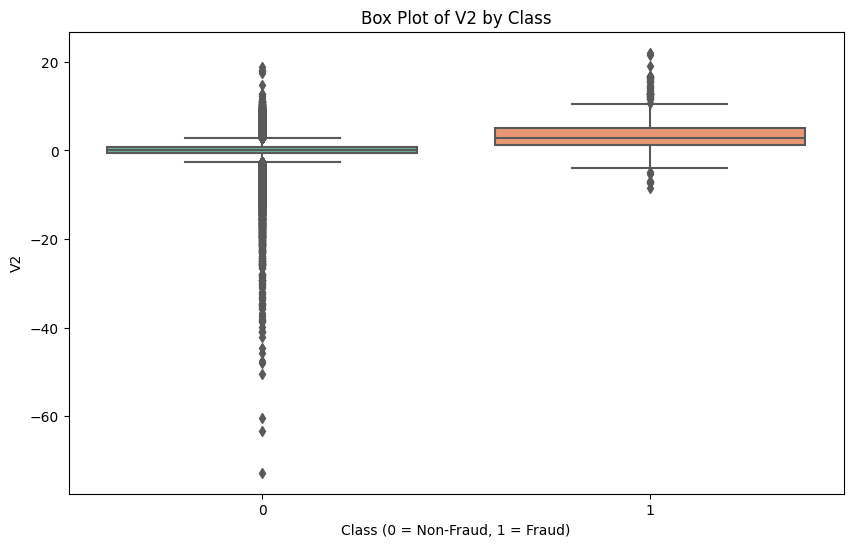

In [21]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='V2', data=credit_card_data, palette='Set2')
plt.title('Box Plot of V2 by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('V2')
plt.show()

In [22]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [23]:
#splitting data into predictants(X) and target(y)
X=credit_card_data.drop(columns='Class',axis=1)
y=credit_card_data['Class']

In [24]:
from imblearn.under_sampling import RandomUnderSampler

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply undersampling only to the training set
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Checking class distribution after undersampling
print("Original training set class distribution:")
print(y_train.value_counts())
print("\nResampled training set class distribution:")
print(pd.Series(y_train_resampled).value_counts())

# Now you can proceed with training your model using X_train_resampled and y_train_resampled

Original training set class distribution:
0    227451
1       394
Name: Class, dtype: int64

Resampled training set class distribution:
0    394
1    394
Name: Class, dtype: int64


In [26]:
# Check whether the data is splitted in 80:20 ratio
print(X.shape, X_train_resampled.shape, X_test.shape)

(284807, 30) (788, 30) (56962, 30)


In [27]:
# The input is scaled to uniformalized data and reprocess 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s=scaler.fit_transform(X_train_resampled)

In [28]:
X_test_s=scaler.transform(X_test)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                # Standardizing the features
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))    # Random Forest Classifier
])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=5)
    
# Calculate mean accuracy
mean_accuracy = scores.mean()

# Fit the pipeline on the training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Model:", RandomForestClassifier())
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))


    
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model: RandomForestClassifier()
Cross-validation Accuracy: 0.9467064419898412
Test Accuracy: 0.9640988729328324
Recall Score:  0.9183673469387755
Precision Score:  0.04231311706629055
F1 Score:  0.08089887640449436
Confusion Matrix:
 [[54827  2037]
 [    8    90]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



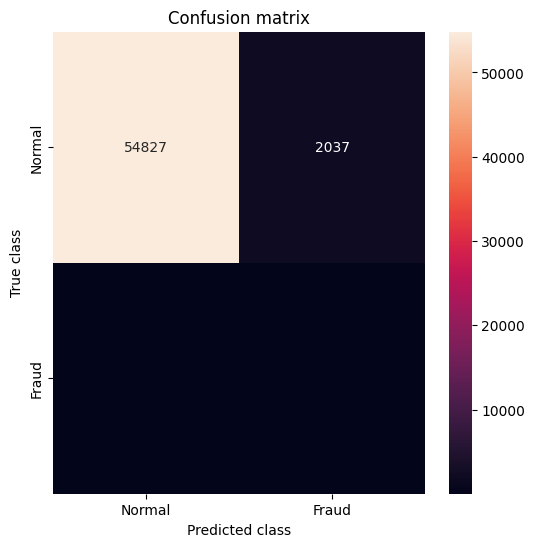

In [31]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud'] 

conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [32]:
# pipeline that perform grid search on classifiers to choose best model

# Define classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC()
}

# Define hyperparameters for each classifier
param_grid = {
    'LogisticRegression': {
        'classifier__C': [0.1, 1, 10]
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7]
    },
    'RandomForest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}

# Loop through each classifier, create a pipeline, and perform GridSearchCV
best_models = {}
for name, model in classifiers.items():
    print(f"Running GridSearch for {name}...")
    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),   # Preprocessing step
        ('classifier', model)          # Classifier step
    ])
    
    # Define grid search
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid[name],
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )
    
    # Fit grid search
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Store the best model and its score
    best_models[name] = {
        'best_model': grid_search.best_estimator_,
        'best_score': grid_search.best_score_
    }

# Print the results
print("\nBest Models and Their Scores:")
for name, details in best_models.items():
    print(f"{name}: Best Score = {details['best_score']:.4f}")

# Save the best model
best_model_name = max(best_models, key=lambda x: best_models[x]['best_score'])
best_model = best_models[best_model_name]['best_model']

model_filename = 'best_credit_card_fraud_detection_model.pkl'
with open(model_filename, 'wb') as file:
    pk.dump(best_model, file)
print(f"Best model ({best_model_name}) saved as '{model_filename}'")

# Load the saved model (for verification or future use)
with open(model_filename, 'rb') as file:
    loaded_model = pk.load(file)

# Evaluate the loaded model on the test set
y_pred = loaded_model.predict(X_test)
print(f"\nClassification Report for the Loaded Model ({best_model_name}):")
print(classification_report(y_test, y_pred))

Running GridSearch for LogisticRegression...
Running GridSearch for KNN...
Running GridSearch for RandomForest...
Running GridSearch for SVM...

Best Models and Their Scores:
LogisticRegression: Best Score = 0.9467
KNN: Best Score = nan
RandomForest: Best Score = 0.9505
SVM: Best Score = 0.9531
Best model (SVM) saved as 'best_credit_card_fraud_detection_model.pkl'

Classification Report for the Loaded Model (SVM):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [33]:
#support vector classifier performs best with accuracy of 95.3%